<a href="https://colab.research.google.com/github/Karlmabs/4MAC/blob/main/4MAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install beautifulsoup4 requests pandas

import requests
from bs4 import BeautifulSoup
import os, os.path as path
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold

In [ ]:
# Define the URL
ligue1_url = 'https://www.ligue1.com/'

seasons = {
    '2023-2024': 'ranking?matchLoc=all&StatsActiveTab=0',
    '2022-2023': 'ranking?matchLoc=all&seasonId=2022-2023&StatsActiveTab=0',
    '2021-2022': 'ranking?matchLoc=all&seasonId=2021-2022&StatsActiveTab=0',
    '2020-2021': 'ranking?matchLoc=all&seasonId=2020-2021&StatsActiveTab=0',
    '2019-2020': 'ranking?matchLoc=all&seasonId=2019-2020&StatsActiveTab=0'
}

In [ ]:
# Function to extract text safely
def get_text_safe(element):
  return element.text.strip() if element else 'N/A'

def clean_dataframe_and_save(df, url, season):
  # 1. Check for null values
  df.isnull().sum()

  # 2. Drop rows with null values
  df = df.dropna()

  # 3. Convert data types
  df['Points'] = df['Points'].astype(int)
  df['Played'] = df['Played'].astype(int)
  df['Won'] = df['Won'].astype(int)
  df['Drawn'] = df['Drawn'].astype(int)
  df['Lost'] = df['Lost'].astype(int)
  df['Goals For'] = df['Goals For'].astype(int)
  df['Goals Against'] = df['Goals Against'].astype(int)
  df['Goal Difference'] = df['Goal Difference'].astype(int)

  # 4. Remove leading and trailing whitespaces
  df['Team'] = df['Team'].str.strip()

  # 5. Standardize data format
  # Convert all team names to uppercase
  df['Team'] = df['Team'].str.upper()

  # 6. Handle missing values
  # Replace any remaining null values with a suitable placeholder, such as 'Unknown' or 0
  df.fillna('Unknown', inplace=True)

  df.to_csv(path.join(url, season+".csv"), header=True, index=False)


# Function to load CSV files
def load_data(file_path):
  return pd.read_csv(file_path)



In [ ]:
for key, value in seasons.items():

  # Send a GET request to the website
  response = requests.get(ligue1_url+value)

  # Parse the HTML content
  soup = BeautifulSoup(response.content, 'html.parser')


  # Find the table containing the data
  table = soup.find('div', class_='GeneralStats-table')

  # Define lists to hold the extracted data
  positions = []
  teams = []
  points = []
  played = []
  won = []
  drawn = []
  lost = []
  gf = []
  ga = []
  diff = []

  # Iterate through each row in the table
  for row in table.find_all('li', class_='GeneralStats-row'):
      position = row.find('div', class_='GeneralStats-item--position')
      positions.append(get_text_safe(position))

      team = row.find('div', class_='GeneralStats-item--club')
      team_name = team.find('span', class_='GeneralStats-clubName desktop-item') if team else None
      teams.append(get_text_safe(team_name))

      point = row.find('div', class_='GeneralStats-item--points')
      points.append(get_text_safe(point))

      played_item = row.find_all('div', class_='GeneralStats-item')
      played.append(get_text_safe(played_item[3]) if len(played_item) > 3 else 'N/A')
      won.append(get_text_safe(played_item[4]) if len(played_item) > 4 else 'N/A')
      drawn.append(get_text_safe(played_item[5]) if len(played_item) > 5 else 'N/A')
      lost.append(get_text_safe(played_item[6]) if len(played_item) > 6 else 'N/A')
      gf.append(get_text_safe(played_item[7]) if len(played_item) > 7 else 'N/A')
      ga.append(get_text_safe(played_item[8]) if len(played_item) > 8 else 'N/A')
      diff.append(get_text_safe(played_item[9]))

  # Create a DataFrame
  df = pd.DataFrame({
      'Position': positions,
      'Team': teams,
      'Points': points,
      'Played': played,
      'Won': won,
      'Drawn': drawn,
      'Lost': lost,
      'Goals For': gf,
      'Goals Against': ga,
      'Goal Difference': diff
  })

  clean_dataframe_and_save(df, "/content/drive/MyDrive/Colab Notebooks/4MAC/datasets/ligue1", key)


In [ ]:
# Define the URL
bundesliga_url = 'https://www.bundesliga.com/en/bundesliga/table/'

seasons = {
    '2023-2024': '2023-2024',
    '2022-2023': '2022-2023',
    '2021-2022': '2021-2022',
    '2020-2021': '2020-2021',
    '2019-2020': '2019-2020'
}

In [ ]:
for key,value in seasons.items():

  bundesliga_response = requests.get(bundesliga_url+value)
  soup = BeautifulSoup(bundesliga_response.text, 'html.parser')

  # Example HTML structure, this might need adjustment based on actual HTML tags
  bundesliga_table = soup.find('table', class_='table')

  # Define lists to hold the extracted data
  rank = []
  team = []
  matches = []
  wins = []
  draws = []
  losses = []
  goals_for = []
  goals_against = []
  goal_diff = []
  points = []

  for row in bundesliga_table.find_all('tr', class_='ng-star-inserted'):
      rank.append(get_text_safe(row.find('td', class_='rank')))
      team.append(get_text_safe(row.find('td', class_='team')))
      matches.append(get_text_safe(row.find('td', class_='matches')))
      wins.append(get_text_safe(row.find('td', class_='wins')))
      draws.append(get_text_safe(row.find('td', class_='draws')))
      losses.append(get_text_safe(row.find('td', class_='losses')))
      goals = get_text_safe(row.find('td', class_='goals'))
      goals_split = goals.split(':')
      goals_for.append(goals_split[0])
      goals_against.append(goals_split[1])
      goal_diff.append(get_text_safe(row.find('td', class_='difference')))
      points.append(get_text_safe(row.find('td', class_='pts')))



  bundesliga_df = pd.DataFrame({
      'Position': rank,
      'Team': team,
      'Points': points,
      'Played': matches,
      'Won': wins,
      'Drawn': draws,
      'Lost': losses,
      'Goals For': goals_for,
      'Goals Against': goals_against,
      'Goal Difference': goal_diff,
  })

  clean_dataframe_and_save(bundesliga_df, "/content/drive/MyDrive/Colab Notebooks/4MAC/datasets/bundesliga", key)




In [ ]:
# Define the URL
serieA_url = 'https://www.legaseriea.it/api/stats/Classificacompleta?CAMPIONATO=A&'

seasons = {
    '2023-2024': 'STAGIONE=2023-24&TURNO=UNICO&GIRONE=UNI',
    '2022-2023': 'STAGIONE=2022-23&TURNO=UNICO&GIRONE=UNI',
    '2021-2022': 'STAGIONE=2021-22&TURNO=UNICO&GIRONE=UNI',
    '2020-2021': 'STAGIONE=2020-21&TURNO=UNICO&GIRONE=UNI',
    '2019-2020': 'STAGIONE=2019-20&TURNO=UNICO&GIRONE=UNI'
}

# Define headers
headers = {
    'accept': '*/*',
    'accept-language': 'fr,fr-FR;q=0.9,en;q=0.8,en-GB;q=0.7,en-US;q=0.6',
    'content-type': 'application/json',
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36 Edg/125.0.0.0'
}

In [ ]:
for key,value in seasons.items():

  serieA_response = requests.get(serieA_url+value, headers=headers)
  print(serieA_url+value)

  # Check if the request was successful
  if serieA_response.status_code == 200:
    data = serieA_response.json()
  else:
    print(f"Failed to retrieve data: {serieA_response.status_code}")
    data = None

  if data and data.get('success'):
    standings = data['data']
  else:
    print("No data available or request failed.")

  # Define lists to hold the extracted data

  teams = []
  played = []
  won = []
  drawn = []
  lost = []
  goals_for = []
  goals_against = []
  goal_difference = []
  points = []

  for team in standings:
    teams.append(team['NomeCompleto'])
    played.append(team['Giocate'])
    won.append(team['Vinte'])
    drawn.append(team['Pareggiate'])
    lost.append(team['Perse'])
    goals_for.append(team['RETIFATTE'])
    goals_against.append(team['RETISUBITE'])
    goal_difference.append(team['RETIFATTE'] - team['RETISUBITE'])
    points.append(team['PuntiCls'])



  # Create DataFrame
  df = pd.DataFrame({
      'Team': teams,
      'Played': played,
      'Won': won,
      'Drawn': drawn,
      'Lost': lost,
      'Goals For': goals_for,
      'Goals Against': goals_against,
      'Goal Difference': goal_difference,
      'Points': points
  })

  clean_dataframe_and_save(df, "/content/drive/MyDrive/Colab Notebooks/4MAC/datasets/serieA", key)





https://www.legaseriea.it/api/stats/Classificacompleta?CAMPIONATO=A&STAGIONE=2023-24&TURNO=UNICO&GIRONE=UNI
https://www.legaseriea.it/api/stats/Classificacompleta?CAMPIONATO=A&STAGIONE=2022-23&TURNO=UNICO&GIRONE=UNI
https://www.legaseriea.it/api/stats/Classificacompleta?CAMPIONATO=A&STAGIONE=2021-22&TURNO=UNICO&GIRONE=UNI
https://www.legaseriea.it/api/stats/Classificacompleta?CAMPIONATO=A&STAGIONE=2020-21&TURNO=UNICO&GIRONE=UNI
https://www.legaseriea.it/api/stats/Classificacompleta?CAMPIONATO=A&STAGIONE=2019-20&TURNO=UNICO&GIRONE=UNI


In [ ]:
# Define the URL
premierleague_url = 'https://footballapi.pulselive.com/football/standings?compSeasons='

seasons = {
    '2023-2024': '578',
    '2022-2023': '489',
    '2021-2022': '418',
    '2020-2021': '363',
    '2019-2020': '274'
}

# Define headers
headers = {
    'accept': '*/*',
    'accept-language': 'fr,fr-FR;q=0.9,en;q=0.8,en-GB;q=0.7,en-US;q=0.6',
    'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36 Edg/125.0.0.0',
    'origin': 'https://www.premierleague.com',
    'referer': 'https://www.premierleague.com/'
}

In [ ]:
for key,value in seasons.items():

  premierleague_response = requests.get(f'{premierleague_url}{value}&altIds=true&detail=2&FOOTBALL_COMPETITION=1&live=true', headers=headers)


  # Check if the request was successful
  if premierleague_response.status_code == 200:
    try:
      data = premierleague_response.json()
    except requests.JSONDecodeError:
      print(f"Failed to parse JSON for season {key}")
      continue
  else:
    print(f"Failed to retrieve data for season {key}: {premierleague_response.status_code}")
    continue

  # Extract the standings data
  standings = data['tables'][0]['entries'] if 'tables' in data and data['tables'] else None
  if not standings:
    print(f"No standings data available for season {key}")
    continue

  # Define lists to hold the extracted data

  teams = []
  played = []
  won = []
  drawn = []
  lost = []
  goals_for = []
  goals_against = []
  goal_difference = []
  points = []

  for entry in standings:
    team = entry['team']
    overall = entry['overall']

    teams.append(team['name'])
    played.append(overall['played'])
    won.append(overall['won'])
    drawn.append(overall['drawn'])
    lost.append(overall['lost'])
    goals_for.append(overall['goalsFor'])
    goals_against.append(overall['goalsAgainst'])
    goal_difference.append(overall['goalsDifference'])
    points.append(overall['points'])



  # Create DataFrame
    df = pd.DataFrame({
        'Team': teams,
        'Played': played,
        'Won': won,
        'Drawn': drawn,
        'Lost': lost,
        'Goals For': goals_for,
        'Goals Against': goals_against,
        'Goal Difference': goal_difference,
        'Points': points
    })

    clean_dataframe_and_save(df, "/content/drive/MyDrive/Colab Notebooks/4MAC/datasets/premierLeague", key)






The best league based on the given criteria is: premierLeague
Cross-validation accuracy: 0.0


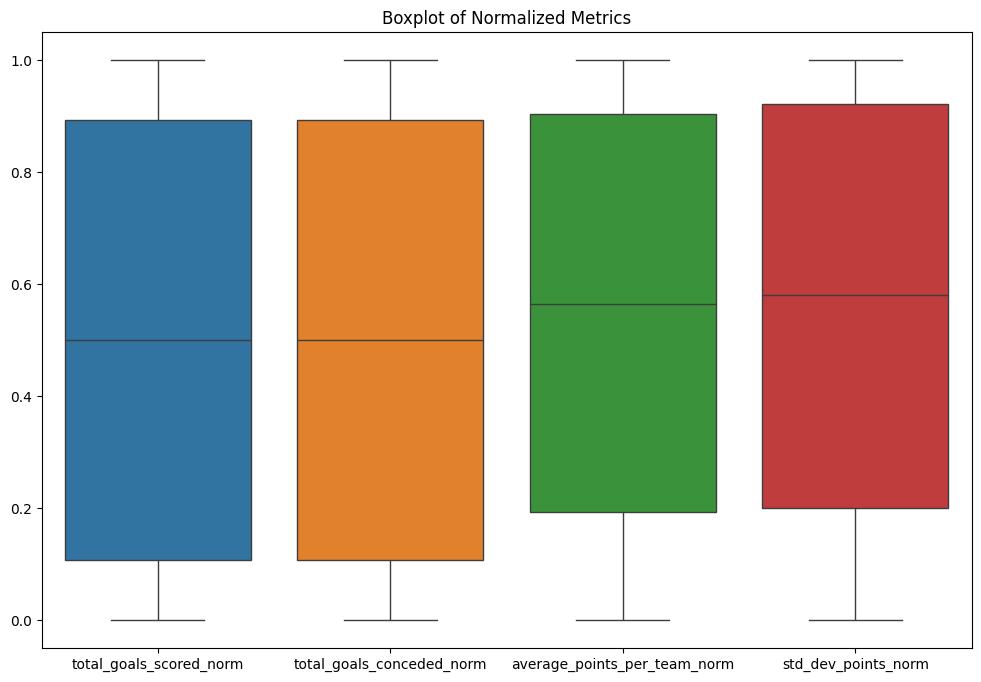

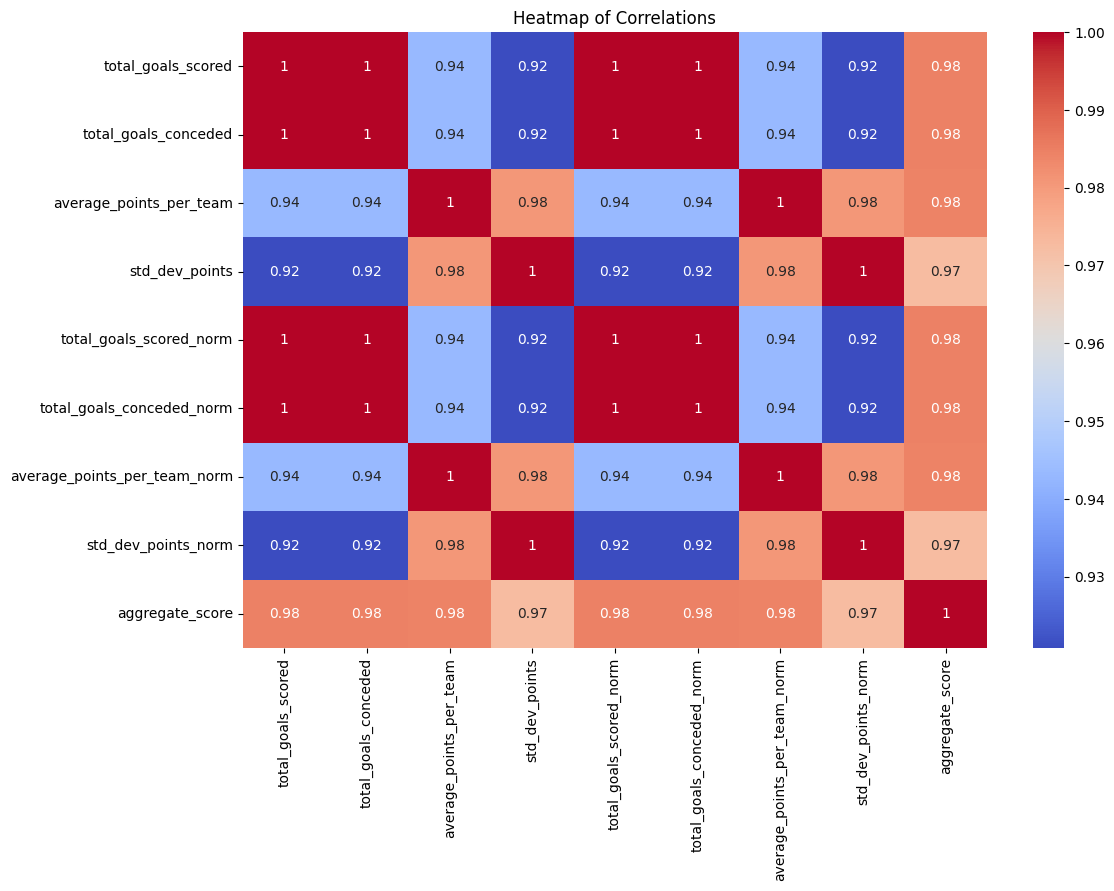

In [ ]:
# Define the path where your datasets are stored
dataset_path = '/content/drive/MyDrive/Colab Notebooks/4MAC/datasets/'  # Update this path to where your CSV files are stored

# List of leagues and seasons
leagues = ['bundesliga', 'ligue1', 'serieA', 'premierLeague']
seasons = ['2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024']

# Load the data
data_frames = {}
for league in leagues:
    data_frames[league] = {}
    for season in seasons:
        file_name = f'{league}/{season}.csv'
        data_frames[league][season] = load_data(os.path.join(dataset_path, file_name))

# Process each DataFrame
league_stats = []

for league, season_data in data_frames.items():
    total_goals_scored = 0
    total_goals_conceded = 0
    total_points = 0
    total_teams = 0
    all_points = []

    for season, df in season_data.items():
        total_goals_scored += df['Goals For'].sum()
        total_goals_conceded += df['Goals Against'].sum()
        total_points += df['Points'].sum()
        total_teams += len(df)
        all_points.extend(df['Points'].values)

    average_points_per_team = total_points / total_teams
    std_dev_points = np.std(all_points)

    league_stats.append({
        'league': league,
        'total_goals_scored': total_goals_scored,
        'total_goals_conceded': total_goals_conceded,
        'average_points_per_team': average_points_per_team,
        'std_dev_points': std_dev_points
    })

# Convert to DataFrame
df_league_stats = pd.DataFrame(league_stats)

# Normalization
df_league_stats['total_goals_scored_norm'] = (df_league_stats['total_goals_scored'] - df_league_stats['total_goals_scored'].min()) / (df_league_stats['total_goals_scored'].max() - df_league_stats['total_goals_scored'].min())
df_league_stats['total_goals_conceded_norm'] = (df_league_stats['total_goals_conceded'].min() - df_league_stats['total_goals_conceded']) / (df_league_stats['total_goals_conceded'].min() - df_league_stats['total_goals_conceded'].max())
df_league_stats['average_points_per_team_norm'] = (df_league_stats['average_points_per_team'] - df_league_stats['average_points_per_team'].min()) / (df_league_stats['average_points_per_team'].max() - df_league_stats['average_points_per_team'].min())
df_league_stats['std_dev_points_norm'] = (df_league_stats['std_dev_points'].min() - df_league_stats['std_dev_points']) / (df_league_stats['std_dev_points'].min() - df_league_stats['std_dev_points'].max())

# Aggregate score (assuming equal weight for simplicity)
df_league_stats['aggregate_score'] = (df_league_stats['total_goals_scored_norm'] + df_league_stats['total_goals_conceded_norm'] + df_league_stats['average_points_per_team_norm'] + df_league_stats['std_dev_points_norm']) / 4

# Determine the best league
best_league = df_league_stats.loc[df_league_stats['aggregate_score'].idxmax(), 'league']

print("The best league based on the given criteria is:", best_league)

# Cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Create empty list to store the scores
scores = []

for train_index, test_index in kf.split(df_league_stats):
    train, test = df_league_stats.iloc[train_index], df_league_stats.iloc[test_index]
    best_league_train = train.loc[train['aggregate_score'].idxmax(), 'league']
    best_league_test = test.loc[test['aggregate_score'].idxmax(), 'league']
    score = best_league_train == best_league_test
    scores.append(score)

print("Cross-validation accuracy:", np.mean(scores))

# Visualizations
# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_league_stats[['total_goals_scored_norm', 'total_goals_conceded_norm', 'average_points_per_team_norm', 'std_dev_points_norm']])
plt.title('Boxplot of Normalized Metrics')
plt.show()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_league_stats.drop(columns=['league']).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()
